In [16]:
!pip install pandas


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


1. One of the steps taken at the beginning of all data analysis projects is data quality
assessment, during which a general view of the ratio of fields and their values is
obtained and familiarity with the data takes place.
Calculate each of the following for 10 arbitrary fields from the Corona disease dataset.

In [1]:
import pandas as pd

# read csv file
df = pd.read_csv('owid-covid-data.csv')
# print first 5 rows of data
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

a) Number of rows without value (Null)

In [18]:
#This code for test
import pandas as pd

# create a sample DataFrame
df1 = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
                   'Age': [25, 30, None, 35, 40],
                   'Height': [5.6, 6.0, 5.7, None, 5.9]
                  })

# count the number of non-null rows
num_rows_without_null = df1.notnull().all(axis=1).sum()

print("Number of rows without null values:", num_rows_without_null)

Number of rows without null values: 3


Main data set use this approach

In [2]:
num_rows_without_null = df.notnull().all(axis=1).sum()

print("Number of rows without null values:", num_rows_without_null)


Number of rows without null values: 0


b) Maximum and minimum values of each column along with its country name

This for test things I want in small case

In [20]:
# create a sample dataframe
df2 = pd.DataFrame({
    'country': ['USA', 'USA', 'Canada', 'Canada'],
    'population': [100, 200, 50, 150],
    'GDP': [200, 400, 100, 300],
    'area': [10, 20, 30, 40]
})

# group the dataframe by 'country'
grouped = df2.groupby('country')

# find the maximum and minimum values of each column for each country
result = grouped.agg(['max', 'min'])

# print the result
print(result)

        population       GDP      area    
               max  min  max  min  max min
country                                   
Canada         150   50  300  100   40  30
USA            200  100  400  200   20  10


In [21]:

# group the dataframe by 'country'
grouped = df.groupby('iso_code')

# find the maximum and minimum values of each column for each country
result = grouped.agg(['max', 'min'])

# print the result
print(result)

              continent                     location                \
                    max            min           max           min   
iso_code                                                             
ABW       North America  North America         Aruba         Aruba   
AFG                Asia           Asia   Afghanistan   Afghanistan   
AGO              Africa         Africa        Angola        Angola   
AIA       North America  North America      Anguilla      Anguilla   
ALB              Europe         Europe       Albania       Albania   
...                 ...            ...           ...           ...   
WSM             Oceania        Oceania         Samoa         Samoa   
YEM                Asia           Asia         Yemen         Yemen   
ZAF              Africa         Africa  South Africa  South Africa   
ZMB              Africa         Africa        Zambia        Zambia   
ZWE              Africa         Africa      Zimbabwe      Zimbabwe   

                dat

/tmp/ipykernel_923824/2556674965.py:5: FutureWarning: ['tests_units'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  result = grouped.agg(['max', 'min'])


In [22]:
# compute median and mean of each column
medians = df.median()
means = df.mean()

/tmp/ipykernel_923824/919107868.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medians = df.median()
/tmp/ipykernel_923824/919107868.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = df.mean()


C. Median and mean of each column

In [23]:
# print results
print("Medians:n", medians)


Medians:n total_cases                                5.800800e+04
new_cases                                  2.100000e+01
new_cases_smoothed                         4.142900e+01
total_deaths                               1.163000e+03
new_deaths                                 0.000000e+00
                                               ...     
population                                 5.882259e+06
excess_mortality_cumulative_absolute       4.342600e+03
excess_mortality_cumulative                7.690000e+00
excess_mortality                           6.800000e+00
excess_mortality_cumulative_per_million    8.633409e+02
Length: 62, dtype: float64


In [24]:
print("nMeans:n", means)


nMeans:n total_cases                                5.367080e+06
new_cases                                  1.117552e+04
new_cases_smoothed                         1.122060e+04
total_deaths                               7.798592e+04
new_deaths                                 9.955503e+01
                                               ...     
population                                 1.281171e+08
excess_mortality_cumulative_absolute       4.683279e+04
excess_mortality_cumulative                9.488196e+00
excess_mortality                           1.307303e+01
excess_mortality_cumulative_per_million    1.437715e+03
Length: 62, dtype: float64


d. Checking the invalid values of each column (negative data and out of range,etc.)

In [3]:
min_values = df.describe().loc['min']
invalid_cols = min_values[min_values < 0].index.tolist()
print(invalid_cols)

['reproduction_rate', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million']


2. Draw a bar chart for the values of new_cases and new_deaths columns of Iran in daily,
weekly and monthly intervals.

In [26]:
!pip install matplotlib

/tmp/ipykernel_953399/2347957054.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iran_data['date'] = pd.to_datetime(iran_data['date'])
/tmp/ipykernel_953399/2347957054.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_df = iran_data.resample('D').sum()[['new_cases', 'new_deaths']]
/tmp/ipykernel_953399/2347957054.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fun

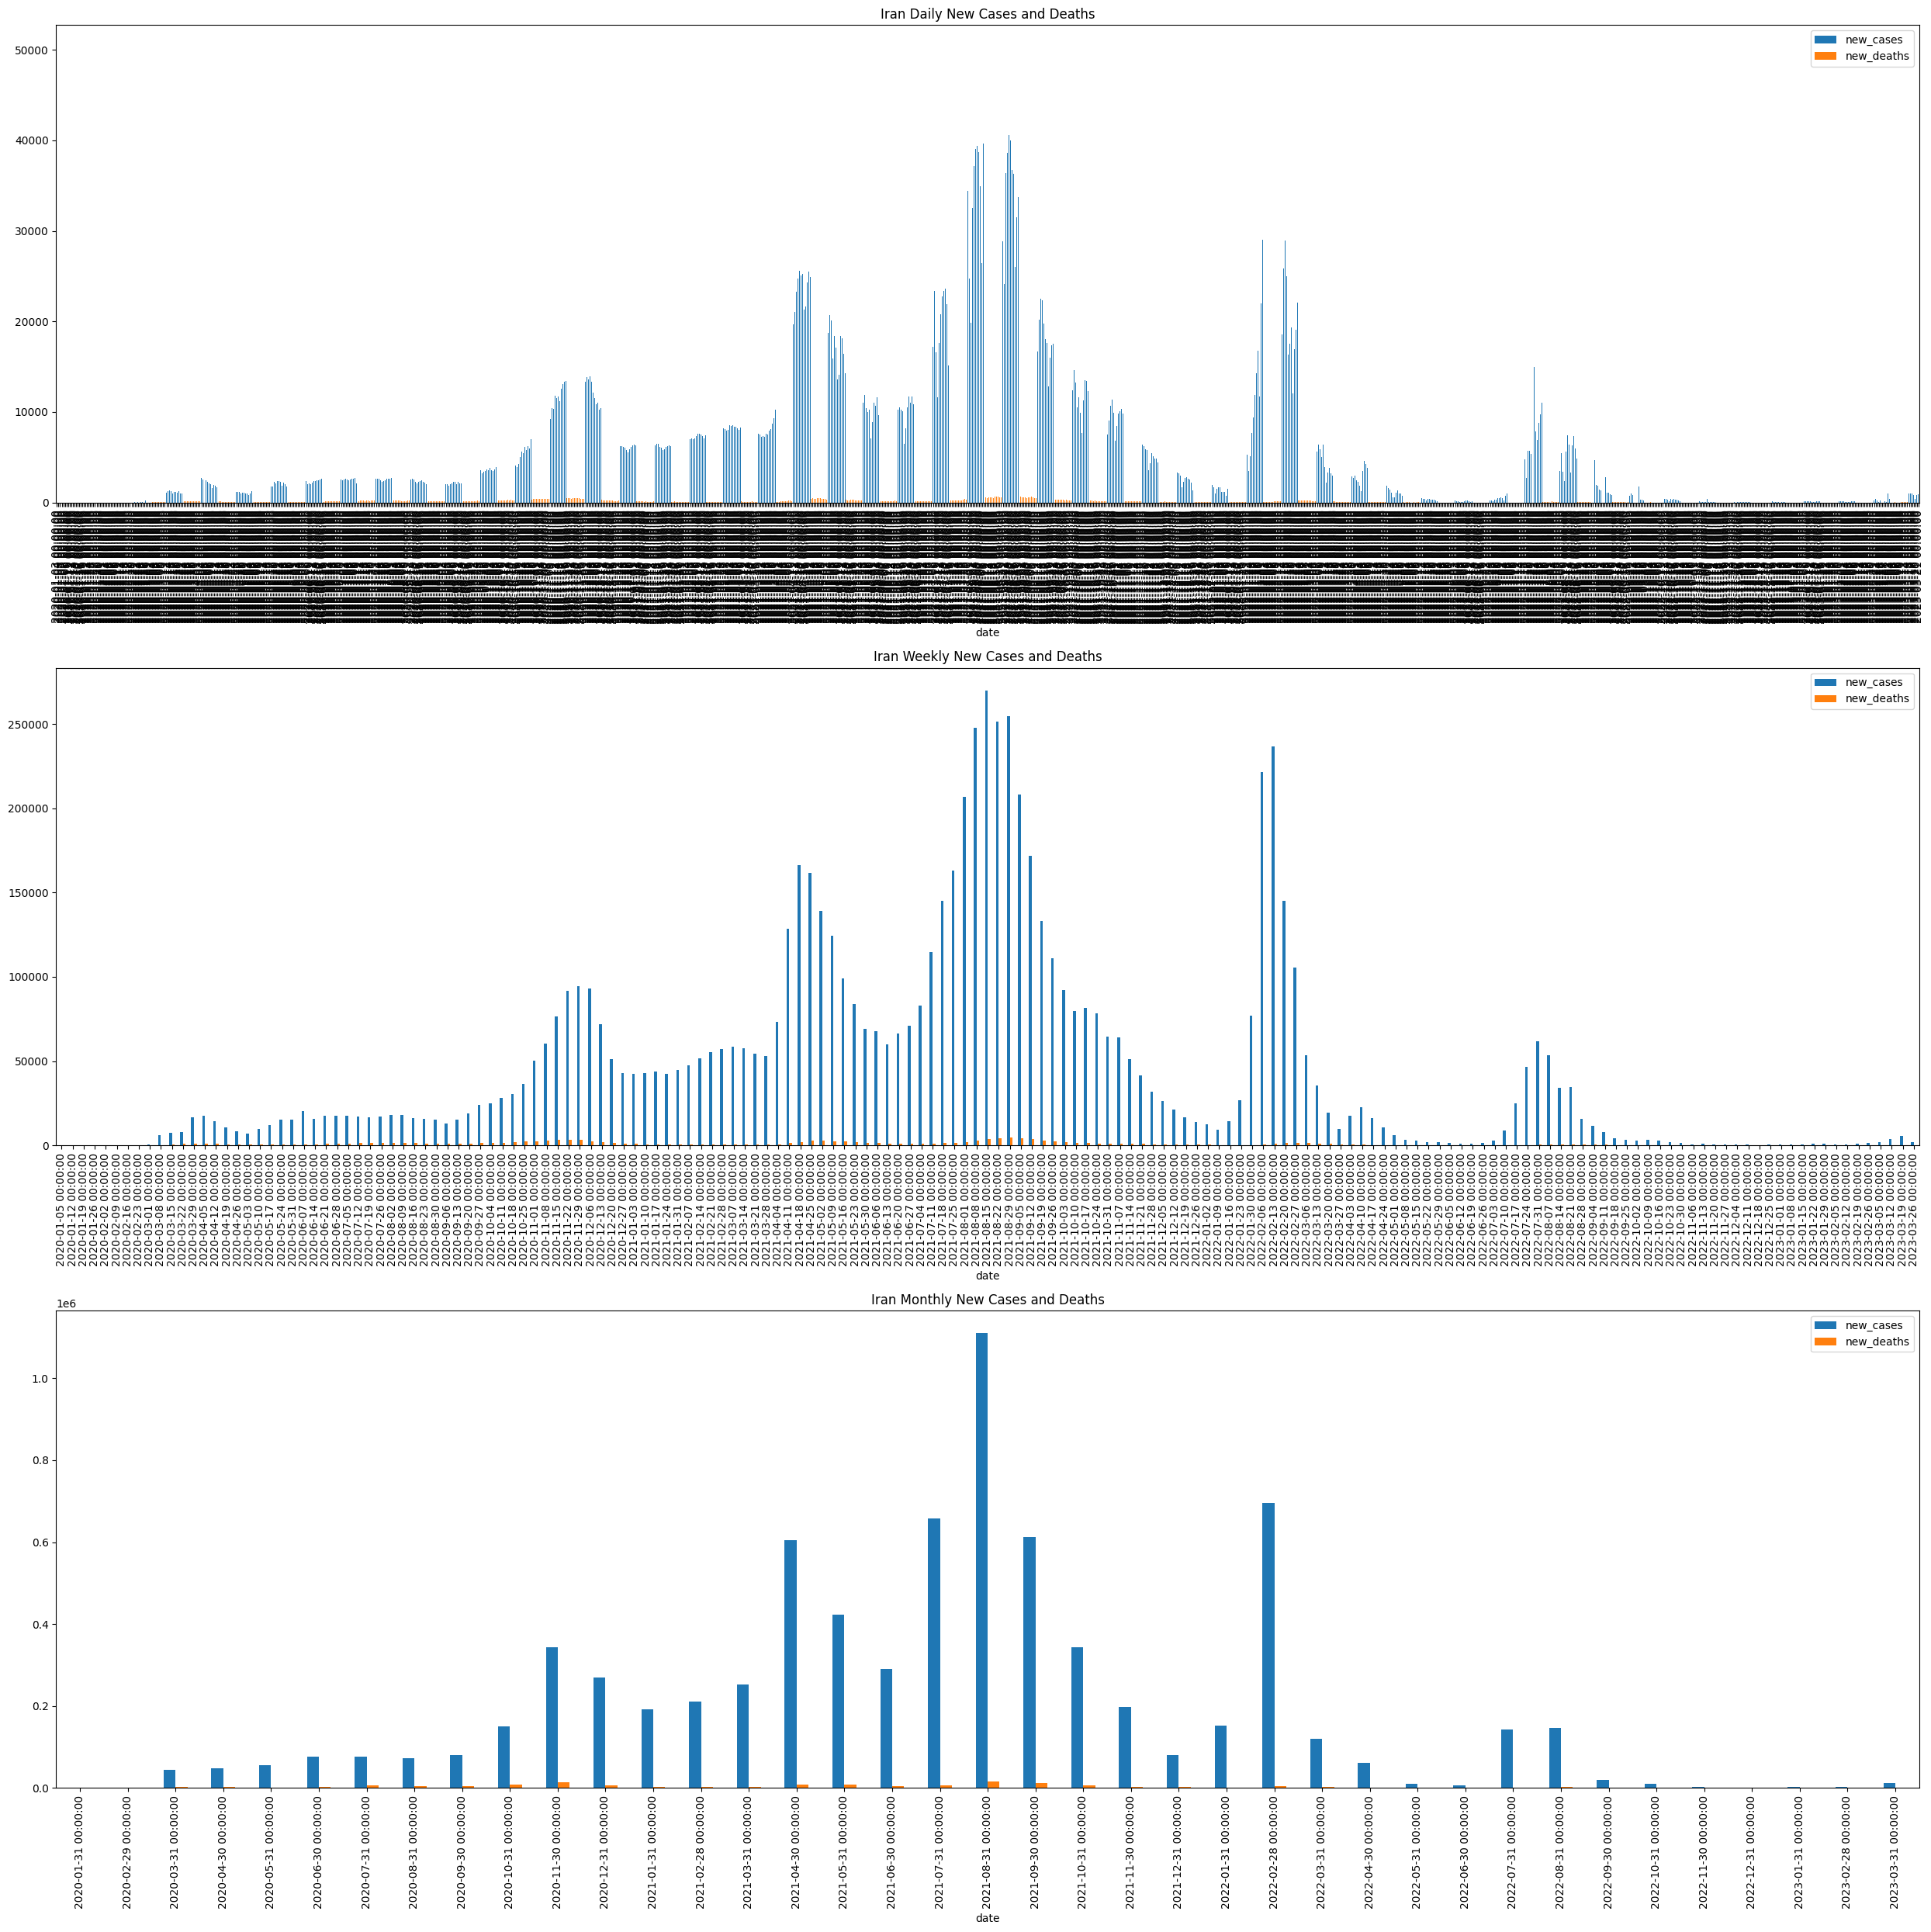

In [2]:
import matplotlib.pyplot as plt

# Filter the DataFrame to only include rows where the country is Iran
iran_data = df[df['iso_code']=='IRN']

# Convert date column to datetime format
iran_data['date'] = pd.to_datetime(iran_data['date'])

# Set date column as index
iran_data.set_index('date', inplace=True)

# Resample data to daily, weekly and monthly intervals
daily_df = iran_data.resample('D').sum()[['new_cases', 'new_deaths']]
weekly_df = iran_data.resample('W').sum()[['new_cases', 'new_deaths']]
monthly_df = iran_data.resample('M').sum()[['new_cases', 'new_deaths']]

# Plot the bar charts
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(25, 25))

daily_df.plot(kind='bar', ax=ax1)
ax1.set_title('Iran Daily New Cases and Deaths')

weekly_df.plot(kind='bar', ax=ax2)
ax2.set_title('Iran Weekly New Cases and Deaths')

monthly_df.plot(kind='bar', ax=ax3)
ax3.set_title('Iran Monthly New Cases and Deaths')

plt.tight_layout()
plt.show()

3. In the new_cases column of France, negative values can be seen, assuming that these
data are errors, what is your best suggestion to deal with these data? State two
methods of finding missing data (missing values), implement one method. Create and
report suggested values to replace these data.

In [7]:
# use isnull() and sum() to count the number of null values in each column
null_counts = df.isnull().sum()
print(null_counts)

iso_code                                        0
continent                                   14097
location                                        0
date                                            0
total_cases                                 35556
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       286752
excess_mortality_cumulative                286752
excess_mortality                           286752
excess_mortality_cumulative_per_million    286752
Length: 67, dtype: int64


In [2]:
# identifying columns with missing data
missing_columns = df.columns[df.isnull().any()].tolist()

# applying mean imputation to fill the missing values
for column in missing_columns:
    try:
        df[column] = df[column].astype(float)
        mean = df[column].mean()
        print(f'columns {column} : replacement {mean}')
        df[column].fillna(value=mean, inplace=True)
    except:
        df[column] = df[column].astype(str)
        max = df[column].max()
        print(f'columns {column} : replacement {max}')
        df[column].fillna(value=max, inplace=True)

columns continent : replacement nan
columns total_cases : replacement 5367079.761248044
columns new_cases : replacement 11175.51843422534
columns new_cases_smoothed : replacement 11220.600421066
columns total_deaths : replacement 77985.917032869
columns new_deaths : replacement 99.55503028665828
columns new_deaths_smoothed : replacement 99.94719390214632
columns total_cases_per_million : replacement 82039.19716272318
columns new_cases_per_million : replacement 168.4267084991773
columns new_cases_smoothed_per_million : replacement 169.11012451854666
columns total_deaths_per_million : replacement 783.1037924701335
columns new_deaths_per_million : replacement 1.0571037850530407
columns new_deaths_smoothed_per_million : replacement 1.0612106528098058
columns reproduction_rate : replacement 0.9114953710968147
columns icu_patients : replacement 750.0985205007536
columns icu_patients_per_million : replacement 17.738968502968227
columns hosp_patients : replacement 4222.2903974825085
columns ho

In [5]:
import matplotlib.pyplot as plt
df = pd.read_csv('owid-covid-data.csv')


4.
a. For the values of the new_cases column, draw a box whisker diagram of the data
of Iran and two neighboring countries of Iran and two European countries in one
diagram. Note that the middle is also visible. As in Figure 2:


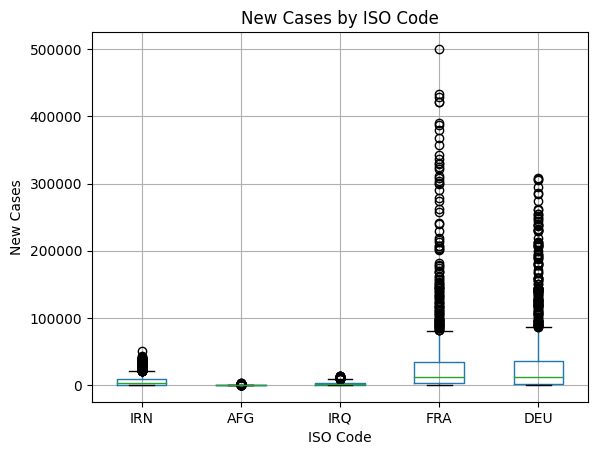

In [31]:
# filter for iso_code IRN, AFG, IRQ, FRA and DEU

iso_codes = ["IRN", "AFG", "IRQ", "FRA", "DEU"]

df_filtered = df[df['iso_code'].isin(iso_codes)]

# create a list of new cases corresponding to each iso_code
new_cases_by_iso_code = [df_filtered[df_filtered['iso_code'] == iso]['new_cases'] for iso in iso_codes]

new_pandas = pd.DataFrame({'IRN':new_cases_by_iso_code[0],
                           'AFG':new_cases_by_iso_code[1],
                            'IRQ':new_cases_by_iso_code[2],
                            'FRA':new_cases_by_iso_code[3],
                             'DEU':new_cases_by_iso_code[4]})
# create a box whisker diagram using matplotlib


pand_plt = new_pandas.boxplot(column = iso_codes)

# add title and axis labels
plt.title("New Cases by ISO Code")
plt.xlabel("ISO Code")
plt.ylabel("New Cases")

# show the plot
plt.show()

In [29]:
new_cases_by_iso_code[4]

96199       0.0
96200       1.0
96201       0.0
96202       0.0
96203       0.0
          ...  
97369    5276.0
97370     989.0
97371     512.0
97372    6600.0
97373       NaN
Name: new_cases, Length: 1175, dtype: float64

b. Calculate and report the value of Q1, Q3, IQR, top whisker and bottom whisker
for the new_cases column values of Iran.

In [26]:
# filter data for IRN
df_irn = df[df['iso_code']=='IRN']

# calculate Q1, Q3, and IQR
Q1 = df_irn['new_cases'].quantile(0.25)
Q3 = df_irn['new_cases'].quantile(0.75)
IQR = Q3 - Q1

# calculate top and bottom whiskers
top_whisker = Q3 + 1.5*IQR
bottom_whisker = Q1 - 1.5*IQR

# print the results
print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)
print("Top whisker: ", top_whisker)
print("Bottom whisker: ", bottom_whisker)

Q1:  543.5
Q3:  8421.25
IQR:  7877.75
Top whisker:  20237.875
Bottom whisker:  -11273.125


c. Find the 10 most outlier data using box whisker plot. The most outlier data
means those that have the greatest distance from the top whisker and bottom
whisker.

In [ ]:
"""
To find the 10 most outlier data using the box whisker plot, we can first calculate the interquartile range (IQR) as:

IQR = Q3 - Q1,

where Q1 is the 25th percentile or the first quartile and Q3 is the 75th percentile or the third quartile.

Then, we can define the outlier threshold as:

upper = Q3 + 1.5 * IQR

lower = Q1 - 1.5 * IQR

Any data point that falls outside these upper and lower thresholds would be considered as an outlier.

We can use NumPy to calculate the quartiles and IQR, and then use a boolean mask to filter the outlier data points. The 10 most extreme outliers can then be sorted based on their distances from the top and bottom whiskers and displayed.

"""

In [39]:
import numpy as np


iso_codes = ["IRN", "AFG", "IRQ", "FRA", "DEU"]
# calculate quartiles and IQR for each iso_code
quartiles = []
for iso in iso_codes:
    iso_data = df_filtered[df_filtered['iso_code'] == iso]['new_cases']
    q1, q3 = np.percentile(iso_data, [25, 75])
    quartiles.append({'iso_code': iso, 'q1': q1, 'q3': q3, 'iqr': q3 - q1})

# define outlier threshold and filter outlier data points
outliers = []
for q in quartiles:
    upper = q['q3'] + 1.5 * q['iqr']
    lower = q['q1'] - 1.5 * q['iqr']
    iso_data = df_filtered[df_filtered['iso_code'] == q['iso_code']]['new_cases']
    iso_outliers = iso_data[(iso_data > upper) | (iso_data < lower)]
    outliers.extend(list(zip([q['iso_code']] * len(iso_outliers), iso_outliers)))

# sort outliers by distance from whiskers and display top 10
outliers_sorted = sorted(outliers, key=lambda x: abs(quartiles[iso_codes.index(x[0])]['q1'] - x[1]), reverse=True)
print("Top 10 most extreme outliers:")

IRN_number = 0
AFG_number = 0
IRQ_number = 0
FRA_number = 0
DEU_number = 0

for i, o in enumerate(outliers_sorted):

    if o[0] == 'IRN' and IRN_number < 10:
        IRN_number += 1
        print(f"{i+1}. ISO code: {o[0]}, value: {o[1]}")

    elif o[0] == 'AFG' and AFG_number < 10:
        AFG_number += 1
        print(f"{i+1}. ISO code: {o[0]}, value: {o[1]}")

    elif o[0] == 'IRQ' and IRQ_number < 10:
        IRQ_number += 1
        print(f"{i+1}. ISO code: {o[0]}, value: {o[1]}")

    elif o[0] == 'FRA' and FRA_number < 10:
        FRA_number += 1
        print(f"{i+1}. ISO code: {o[0]}, value: {o[1]}")

    elif o[0] == 'DEU' and DEU_number < 10:
        DEU_number += 1
        print(f"{i+1}. ISO code: {o[0]}, value: {o[1]}")


121
Top 10 most extreme outliers:
1. ISO code: IRN, value: 50228.0
2. ISO code: IRN, value: 42541.0
3. ISO code: IRN, value: 41194.0
4. ISO code: IRN, value: 40808.0
5. ISO code: IRN, value: 40623.0
6. ISO code: IRN, value: 39983.0
7. ISO code: IRN, value: 39819.0
8. ISO code: IRN, value: 39619.0
9. ISO code: IRN, value: 39357.0
10. ISO code: IRN, value: 39174.0
99. ISO code: IRQ, value: 13515.0
100. ISO code: IRQ, value: 13259.0
101. ISO code: IRQ, value: 12734.0
102. ISO code: IRQ, value: 12713.0
103. ISO code: IRQ, value: 12597.0
104. ISO code: IRQ, value: 12185.0
105. ISO code: IRQ, value: 12180.0
106. ISO code: IRQ, value: 11871.0
107. ISO code: IRQ, value: 11644.0
108. ISO code: IRQ, value: 11435.0
